In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(20)

In [2]:
# Number of data points
n = 100

# To generate two clusters of data points
mean1 = [2.5, 2.5]
cov1 = [[0.2, 0.15], [0.15, 0.2]]
cluster1 = np.random.multivariate_normal(mean1, cov1, n)

mean2 = [4.0, 4.0]
cov2 = [[0.2, 0.15], [0.15, 0.2]]
cluster2 = np.random.multivariate_normal(mean2, cov2, n)

# Create the labels
labels=np.concatenate([np.zeros(n),np.ones(n)])

# Combine data points
data = np.vstack((cluster1, cluster2))

# Shuffling & train/test split
shuffle_idx=np.arange(labels.shape[0])
np.random.shuffle(shuffle_idx)

X,y=data[shuffle_idx],labels[shuffle_idx]
X_train,X_test=X[shuffle_idx[:140]],X[shuffle_idx[140:]]
y_train,y_test=y[shuffle_idx[:140]],y[shuffle_idx[140:]]

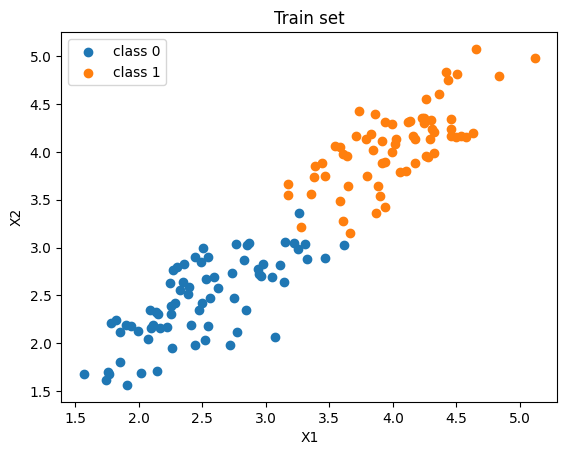

In [3]:
# Plot train set
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],label='class 0', marker='o')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],label='class 1', marker='o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Train set')
plt.legend()
plt.show()

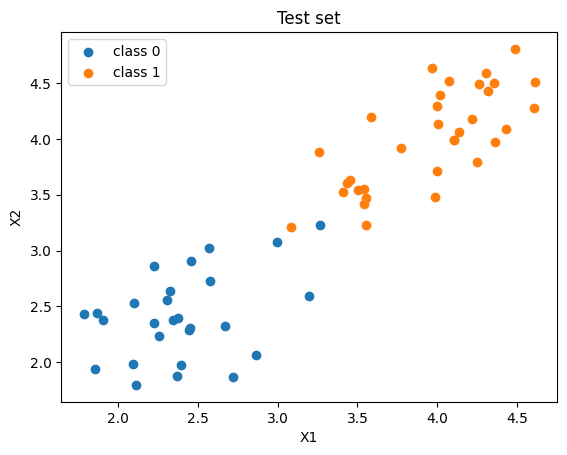

In [4]:
# Plot test set
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],label='class 0', marker='o')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],label='class 1', marker='o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test set')
plt.legend()
plt.show()

In [5]:
#implementation
class Adaline():
  def __init__(self, num_features):
    self.num_features=num_features
    self.weights=np.zeros([num_features, 1],dtype=float)
    self.bias=np.zeros([1],dtype=float)

  def forward(self ,x):
    net_input= ( x @ self.weights) + self.bias
    return net_input.reshape(-1)

  def backward (self , x, yhat, y):
    grad_loss_wrt_yhat = 2*(yhat - y)

    grad_yhat_wrt_weights = x
    grad_yhat_wrt_bias = 1.


    grad_loss_weights =  (grad_yhat_wrt_weights.T@grad_loss_wrt_yhat.reshape(-1,1))/y.shape[0]
    grad_loss_bias = np.sum(grad_yhat_wrt_bias*grad_loss_wrt_yhat) / y.shape[0]

    # return negative gradient
    return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [6]:
##### Training and evaluation wrappers

def loss(yhat, y):
    return np.mean((yhat - y)**2)

def train(model, x, y, num_epochs, learning_rate=0.01, minibatch_size=14):
    cost = []

    for e in range(num_epochs):

        # Shuffle the dataset
        shuffle_idx = np.random.permutation(y.shape[0])
        x_shuffled = x[shuffle_idx]
        y_shuffled = y[shuffle_idx]

        minibatches = [
            (x_shuffled[i:i + minibatch_size], y_shuffled[i:i + minibatch_size])
            for i in range(0, len(x_shuffled), minibatch_size)
        ]

        for minibatch_x, minibatch_y in minibatches:
            # Compute outputs
            yhat = model.forward(minibatch_x)

            # Compute gradients
            negative_grad_w, negative_grad_b = model.backward(minibatch_x, yhat, minibatch_y)

            # Update weights
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b

            # Logging
            minibatch_loss = loss(yhat, minibatch_y)
            print('    Minibatch MSE: %.3f' % minibatch_loss)

            # Logging
        yhat = model.forward(x)
        current_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % current_loss)
        cost.append(current_loss)

    return cost


In [7]:
model = Adaline(num_features=X_train.shape[1])
cost = train(model,
             X_train, y_train,
             num_epochs=25,
             learning_rate=0.01,
             minibatch_size=14)

    Minibatch MSE: 0.357
    Minibatch MSE: 0.308
    Minibatch MSE: 0.169
    Minibatch MSE: 0.163
    Minibatch MSE: 0.142
    Minibatch MSE: 0.157
    Minibatch MSE: 0.138
    Minibatch MSE: 0.147
    Minibatch MSE: 0.144
    Minibatch MSE: 0.120
Epoch: 001 | MSE: 0.15021
    Minibatch MSE: 0.181
    Minibatch MSE: 0.153
    Minibatch MSE: 0.140
    Minibatch MSE: 0.149
    Minibatch MSE: 0.138
    Minibatch MSE: 0.143
    Minibatch MSE: 0.130
    Minibatch MSE: 0.155
    Minibatch MSE: 0.143
    Minibatch MSE: 0.157
Epoch: 002 | MSE: 0.14237
    Minibatch MSE: 0.142
    Minibatch MSE: 0.159
    Minibatch MSE: 0.137
    Minibatch MSE: 0.147
    Minibatch MSE: 0.163
    Minibatch MSE: 0.125
    Minibatch MSE: 0.139
    Minibatch MSE: 0.156
    Minibatch MSE: 0.144
    Minibatch MSE: 0.119
Epoch: 003 | MSE: 0.14044
    Minibatch MSE: 0.124
    Minibatch MSE: 0.169
    Minibatch MSE: 0.150
    Minibatch MSE: 0.129
    Minibatch MSE: 0.146
    Minibatch MSE: 0.145
    Minibatch MSE: 0.1

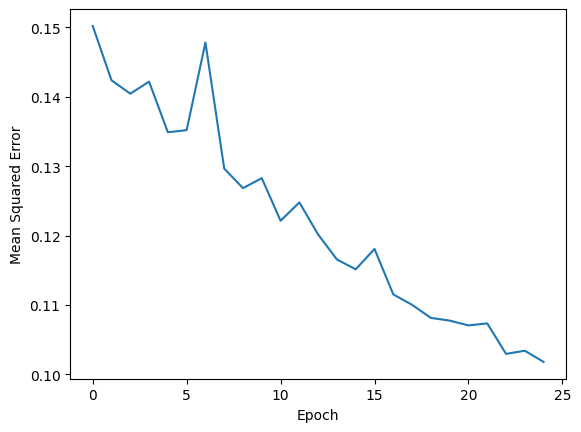

In [8]:
# plot
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [9]:
# Get Train and Test accuracy
train_pred = model.forward(X_train)
train_acc = np.mean((np.where(train_pred > 0.5, 1, 0) == y_train))
test_pred = model.forward(X_test)
test_acc = np.mean((np.where(test_pred > 0.5, 1, 0) == y_test))

print('Training Accuracy: %.2f' % (train_acc * 100))
print('Test Accuracy: %.2f' % (test_acc * 100))


Training Accuracy: 92.14
Test Accuracy: 96.67


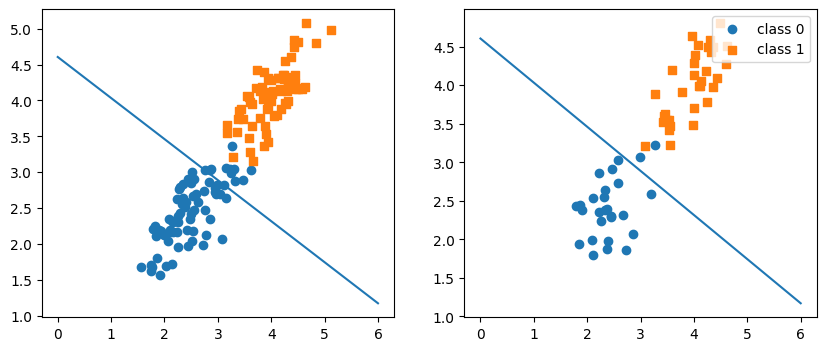

In [10]:
w, b = model.weights, model.bias-0.5

x_min = 0
y_min = ( (-(w[0] * x_min) - b[0])  / w[1] )

x_max = 6
y_max = ( (-(w[0] * x_max) - b[0])  / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 4))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper right')
plt.show()